In [1]:
import os
import matplotlib.pyplot as plt
from src.data.dataset_blond import BLOND
from src.data.dataset_blond import TYPE_CLASS
from src.features.features import *
import pandas as pd
import numpy as np
import librosa

C:\Users\jonas\miniconda3\envs\py3.8-gpu\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [2]:
dataset = BLOND('all', '../data/')
dataset.labels

,Medal,Socket,Appliance,Type,Timestamp,fold,synthetic,Class,Weight
0,1,4,Dell U2713Hb,Monitor,2016-10-04 08_48_14.591904+02_00,train,0,4.0,1.487653
1,1,4,Dell U2713Hb,Monitor,2016-10-04 11_19_29.528961+02_00,test,0,4.0,1.487653
2,1,6,MacBook Pro 13'' Mid-2014,Laptop,2016-10-14 10_51_33.420410+02_00,val,0,3.0,5.210433
3,14,6,Lenovo L540,Laptop,2016-10-05 10_52_25.166016+02_00,train,0,3.0,5.210433
4,15,3,Apple MD813ZM,USB Charger,2016-10-05 15_20_46.083069+02_00,train,0,9.0,28.229469
...,...,...,...,...,...,...,...,...,...
11715,10,5,Dell U2711,Monitor,2016-10-19 17_32_02.662354+02_00,train,0,4.0,1.487653
11716,10,6,Dell P2210,Monitor,2016-10-19 10_58_24.676437+02_00,train,0,4.0,1.487653
11717,10,6,Dell P2210,Monitor,2016-10-19 11_18_13.249512+02_00,train,0,4.0,1.487653
11718,10,6,Dell P2210,Monitor,2016-10-19 11_18_27.339478+02_00,train,0,4.0,1.487653


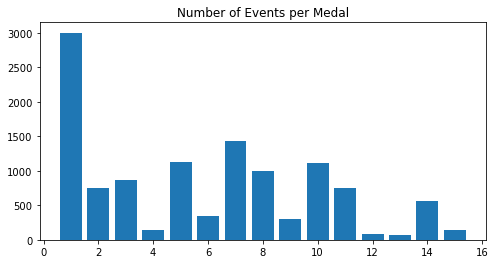

In [3]:
tmp = dataset.labels.groupby(['Medal']).count()
plt.figure(figsize=(8,4))
plt.bar(x=tmp.index, height=tmp['Socket'])
plt.title('Number of Events per Medal')
plt.show()

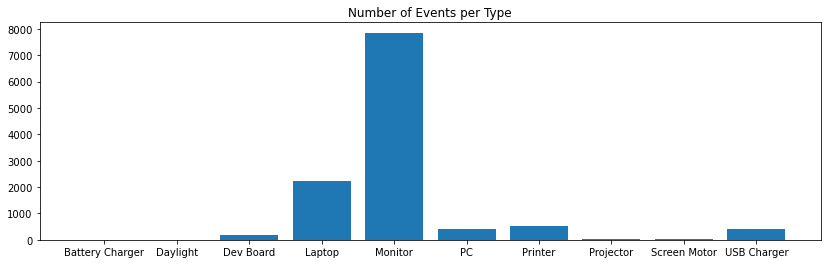

In [4]:
tmp = dataset.labels.groupby(['Type']).count()
plt.figure(figsize=(14,4))
plt.bar(x=tmp.index, height=tmp['Medal'])
plt.title('Number of Events per Type')
#plt.savefig('figures/number_of_events')
plt.show()

<ipython-input-5-8651d3a5e041>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 5, i * 5 + 1)
<ipython-input-5-8651d3a5e041>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 5, i * 5 + 2)
<ipython-input-5-8651d3a5e041>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always b

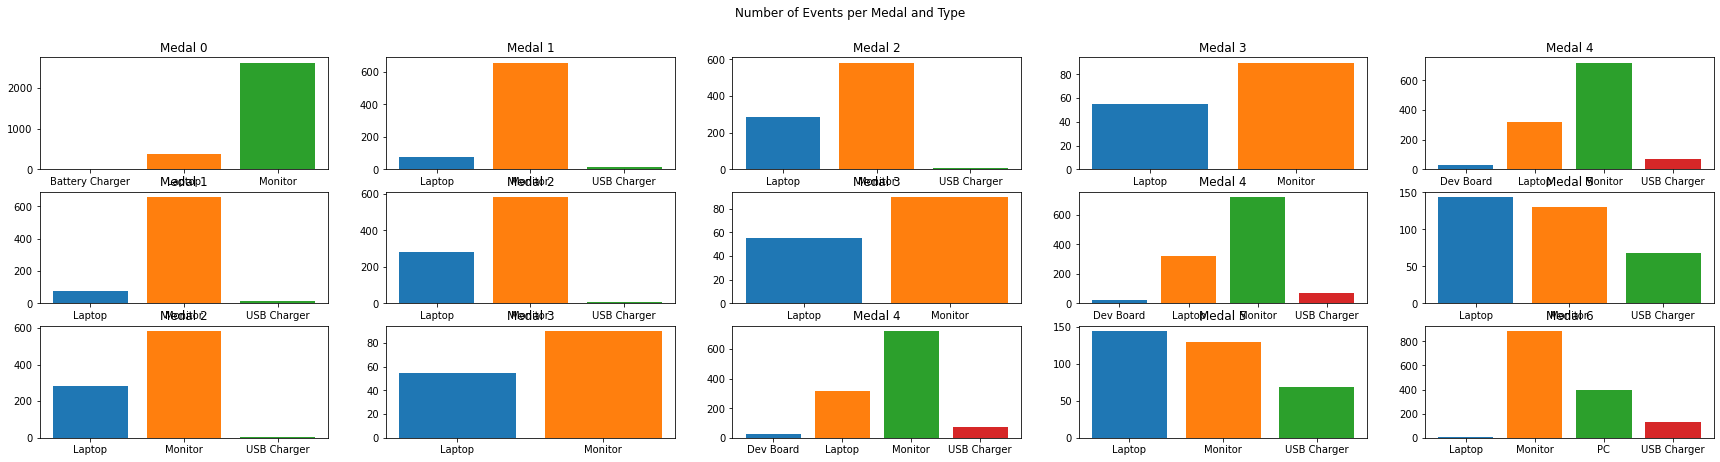

In [5]:
tmp = dataset.labels.groupby(['Medal', 'Type']).count()
plt.figure(figsize=(30, 7))
plt.suptitle('Number of Events per Medal and Type')

for i in range(0, 3):
    for idx in tmp.index:

        if idx[0] == i+1:
            plt.subplot(3, 5, i * 5 + 1)

            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i}')

        if idx[0] == i+2:
            plt.subplot(3, 5, i * 5 + 2)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+1}')

        if idx[0] == i+3:
            plt.subplot(3, 5, i * 5 + 3)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+2}')

        if idx[0] == i+4:
            plt.subplot(3, 5, i * 5 + 4)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+3}')

        if idx[0] == i+5:
            plt.subplot(3, 5, i * 5 + 5)
            plt.bar(x=idx[1], height=tmp[tmp.index==idx]['Socket'])
            plt.title(f'Medal {i+4}')

#plt.savefig('figures/events_per_medal', dpi = 300)
plt.show()

In [6]:
num_examples = 4
idx = np.random.choice(len(dataset), size=num_examples, replace=False)
class_type = {v: k for k, v in TYPE_CLASS.items()}

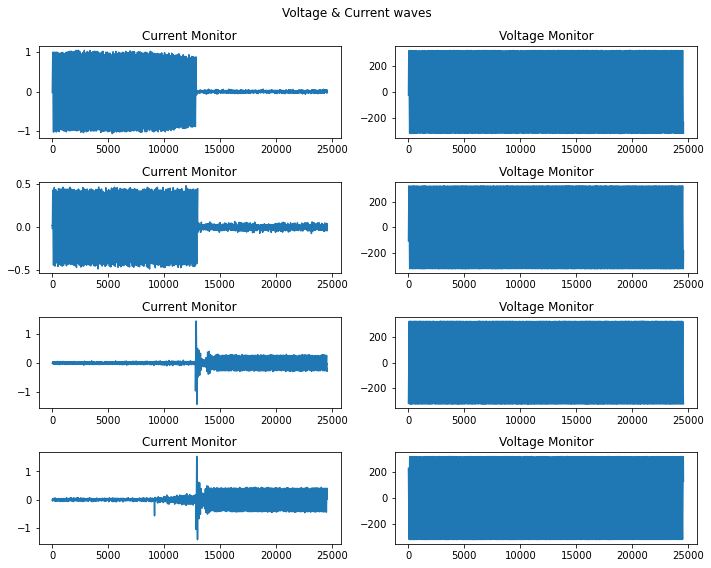

In [7]:
plt.figure(figsize=(10, 2 * num_examples))
plt.suptitle('Voltage & Current waves')

for i, ix in enumerate(idx):
    current, voltage, class_nr = dataset[ix]

    plt.subplot(num_examples, 2, i * 2 + 1)
    plt.plot(current)
    plt.title(f'Current {class_type[class_nr]}')

    plt.subplot(num_examples, 2, i * 2 + 2)
    plt.plot(voltage)
    plt.title(f'Voltage {class_type[class_nr]}')

plt.tight_layout()
plt.show()

## Electrical Background

- German energy supply network
    - 50 Hz (60Hz in other countries)
    - A current wave performs 50 periods in 1 second

- BLOND dataset
    - 3 circuits with a nominal phase shift of 120° (typical 3-phase supply)
    - 50kHz and 6.4kHz sampling rate of ground truth

#### Calculation of Cycles

- Measurement frequency / Current frequency = Number of samples per cycle

- 50000Hz / 50Hz = 1000 Samples per Cycle

- 6400Hz / 50 Hz = 128 Samples per Cycle

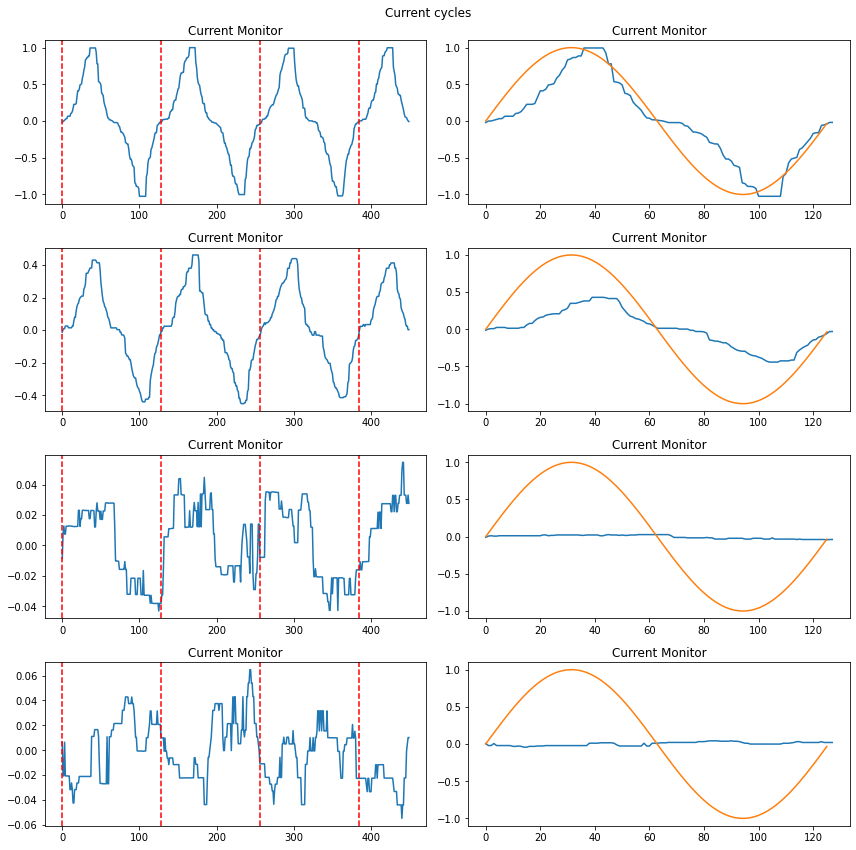

In [8]:
plt.figure(figsize=(6*2, 3*num_examples))
plt.suptitle('Current cycles')
sin_curve = np.sin(np.arange(0,2*np.pi,0.05))

len_window = 450
for i, ix in enumerate(idx):
    current, voltage, class_nr = dataset[ix]

    plt.subplot(num_examples, 2, i * 2 + 1)
    plt.plot(current[:len_window])
    xposition = np.arange(int(len_window/128+1))*128
    for xc in xposition:
        plt.axvline(x=xc, color='red', linestyle='--')
    plt.title(f'Current {class_type[class_nr]}')

    plt.subplot(num_examples, 2, i * 2 + 2)
    plt.plot(current[:128])
    plt.plot(sin_curve)
    plt.title(f'Current {class_type[class_nr]}')

plt.tight_layout()
#plt.savefig('figures/fig', dpi = 600)
plt.show()

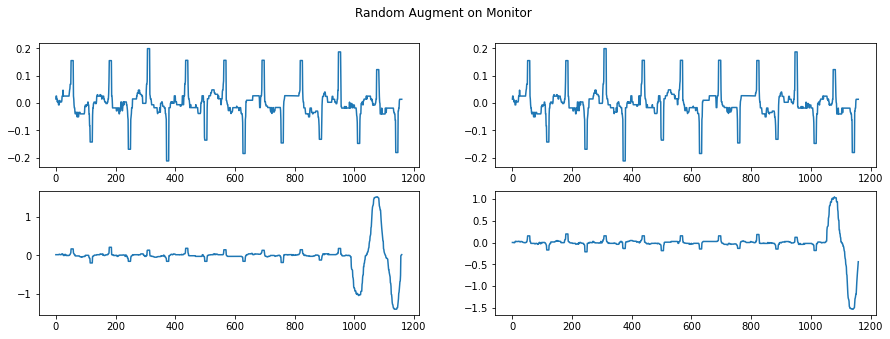

In [9]:
aug = RandomAugment(p=1, measurement_frequency=6400)

plt.figure(figsize=(15, 5))

sample = dataset[ix]

current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
idx_0 = int(len(current) / 2.1)
idx_1 = len(current) - idx_0
plt.subplot(2, 2, 1)
plt.suptitle(f'Random Augment on {class_type[class_nr]}')
plt.plot(current[idx_0:idx_1])

current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
plt.subplot(2, 2, 2)
plt.plot(current[idx_0:idx_1])

current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
plt.subplot(2, 2, 3)
plt.plot(current[idx_0:idx_1])

current, _, _, class_nr = aug((sample[0], sample[1], None, sample[2]))
plt.subplot(2, 2, 4)
plt.plot(current[idx_0:idx_1])

plt.show()

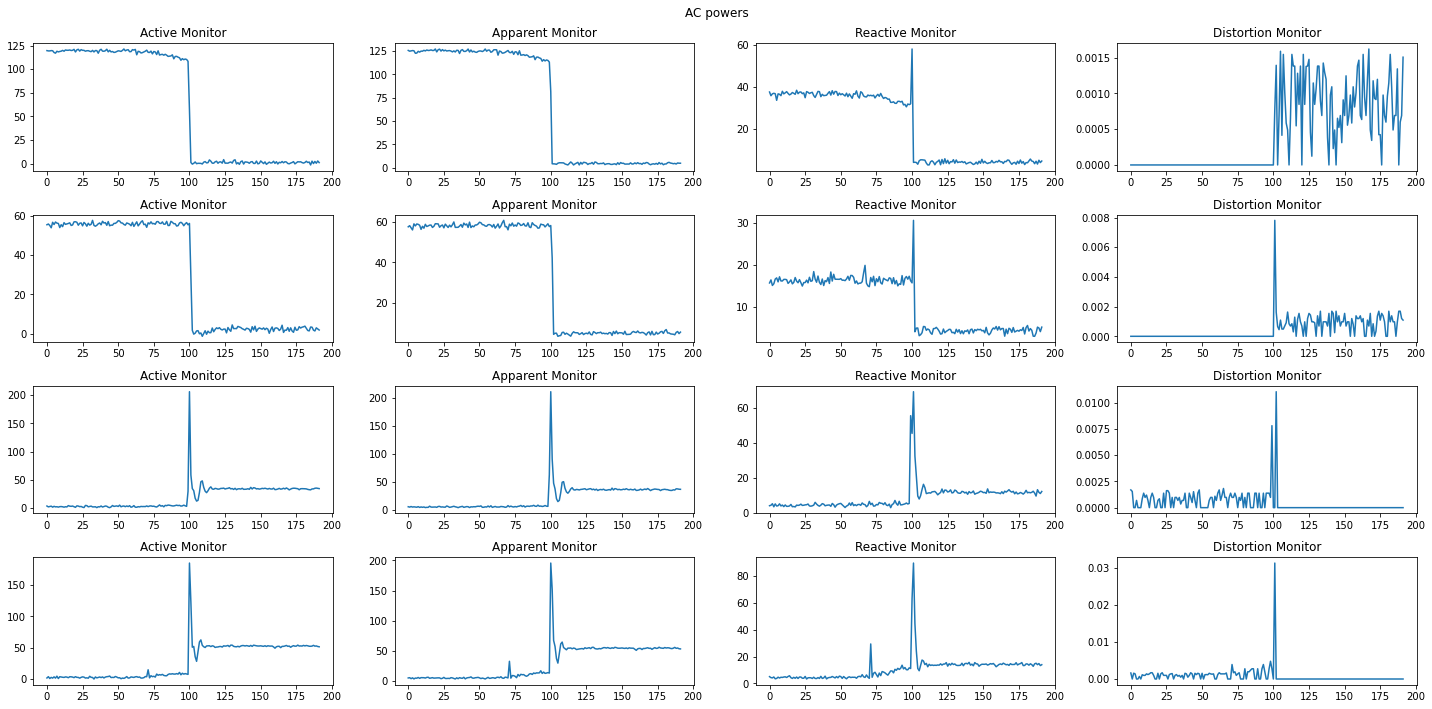

In [10]:
ac = ACPower(measurement_frequency=6400)

plt.figure(figsize=(10*num_examples/2, 5*num_examples/2))
plt.suptitle(f'AC powers')

for i, ix in enumerate(idx):
    sample = dataset[ix]
    _, _, features, class_nr = ac((sample[0], sample[1], None, sample[2]))

    plt.subplot(num_examples, 4, i*4+1)
    plt.plot(features[0])
    plt.title(f'Active {class_type[class_nr]}')

    plt.subplot(num_examples, 4, i*4+2)
    plt.plot(features[1])
    plt.title(f'Apparent {class_type[class_nr]}')

    plt.subplot(num_examples, 4, i*4+3)
    plt.plot(features[2])
    plt.title(f'Reactive {class_type[class_nr]}')

    plt.subplot(num_examples, 4, i*4+4)
    plt.plot(features[3])
    plt.title(f'Distortion {class_type[class_nr]}')

plt.tight_layout()
plt.show()


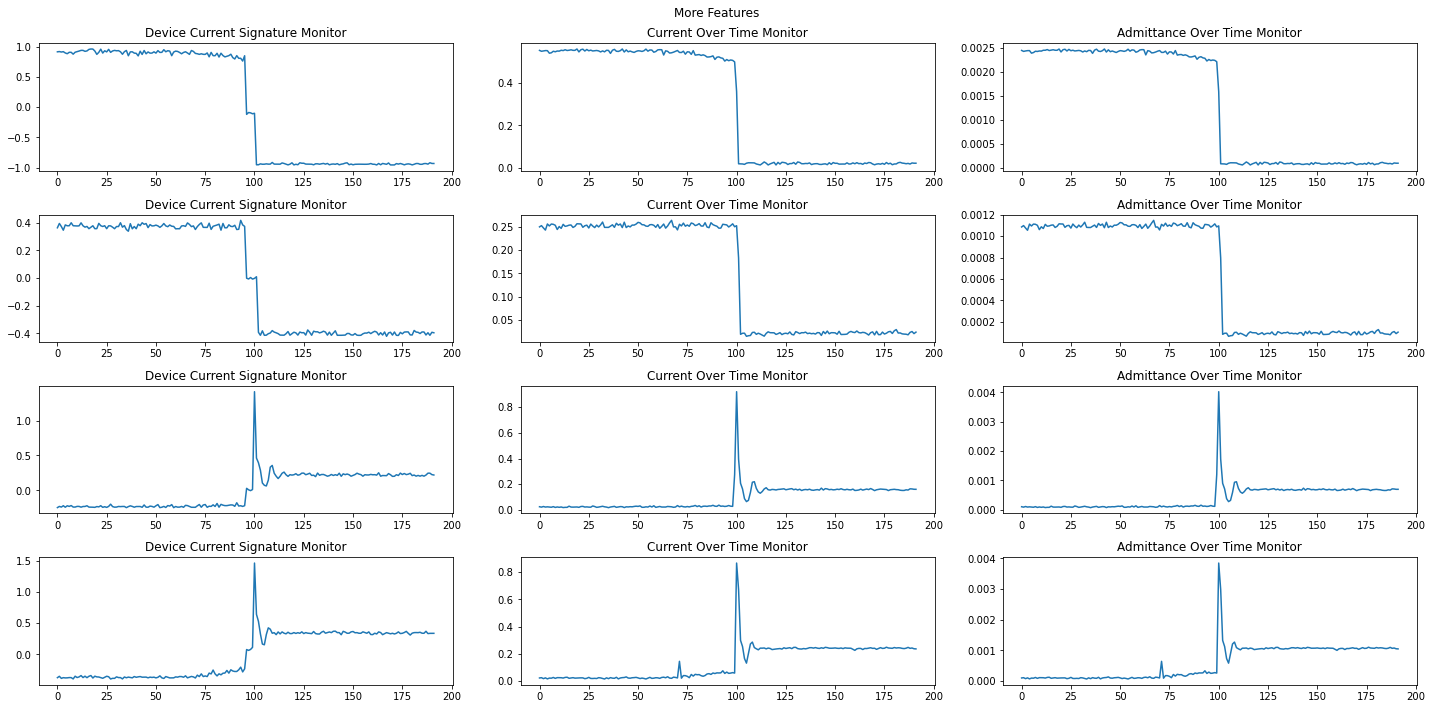

In [11]:
dcs = DCS(measurement_frequency=6400)
cot = COT(measurement_frequency=6400)
aot = AOT(measurement_frequency=6400)

plt.figure(figsize=(10*num_examples/2, 5*num_examples/2))
plt.suptitle(f'More Features')

for i, ix in enumerate(idx):
    sample = dataset[ix]

    _, _, features, class_nr = dcs((sample[0], sample[1], None, sample[2]))
    plt.subplot(num_examples, 3, i*3+1)
    plt.plot(features.squeeze())
    plt.title(f'Device Current Signature {class_type[class_nr]}')

    _, _, features, class_nr = cot((sample[0], sample[1], None, sample[2]))
    plt.subplot(num_examples, 3, i*3+2)
    plt.plot(features.squeeze())
    plt.title(f'Current Over Time {class_type[class_nr]}')

    _, _, features, class_nr = aot((sample[0], sample[1], None, sample[2]))
    plt.subplot(num_examples, 3, i*3+3)
    plt.plot(features.squeeze())
    plt.title(f'Admittance Over Time {class_type[class_nr]}')

plt.tight_layout()
plt.show()

C:\Users\jonas\miniconda3\envs\py3.8-gpu\lib\site-packages\torchaudio\functional\functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (128) may be set too low.
  warnings.warn(


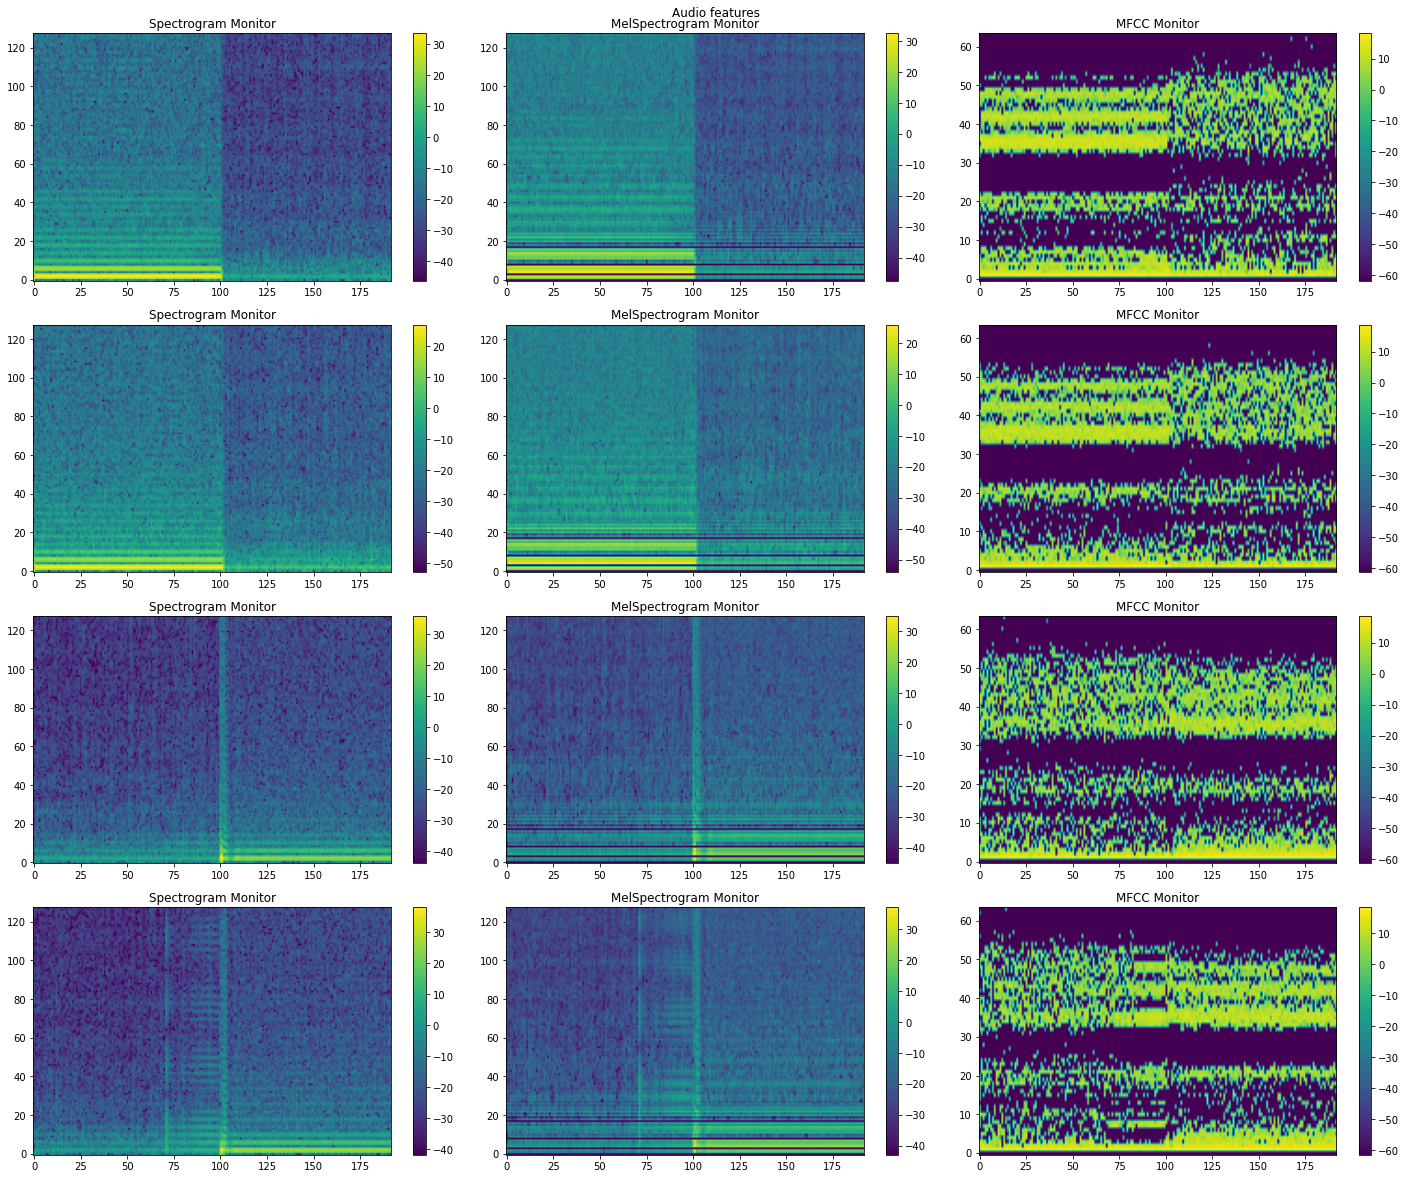

In [12]:
spec = Spectrogram(measurement_frequency=6400)
mel_spec = MelSpectrogram(measurement_frequency=6400)
mfcc = MFCC(measurement_frequency=6400)

plt.figure(figsize=(10*num_examples/2, 5*num_examples/1.2))
plt.suptitle(f'Audio features')

for i, ix in enumerate(idx):
    sample = dataset[ix]

    _, _, features, class_nr = spec((sample[0], sample[1], None, sample[2]))
    plt.subplot(num_examples, 3, i*3+1)
    plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
    plt.colorbar()
    plt.title(f'Spectrogram {class_type[class_nr]}')

    _, _, features, class_nr = mel_spec((sample[0], sample[1], None, sample[2]))
    plt.subplot(num_examples, 3, i*3+2)
    plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
    plt.colorbar()
    plt.title(f'MelSpectrogram {class_type[class_nr]}')

    _, _, features, class_nr = mfcc((sample[0], sample[1], None, sample[2]))
    plt.subplot(num_examples, 3, i*3+3)
    plt.imshow(librosa.power_to_db(features), origin='lower', aspect='auto')
    plt.colorbar()
    plt.title(f'MFCC {class_type[class_nr]}')

plt.tight_layout()
plt.show()

